# Perform dimension reduction on healthcare data

In [ ]:
import pandas as pd

df = pd.read_csv('breast_cancer.csv')

In [ ]:
X = df.drop('target', axis=1)
Y = df['target']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

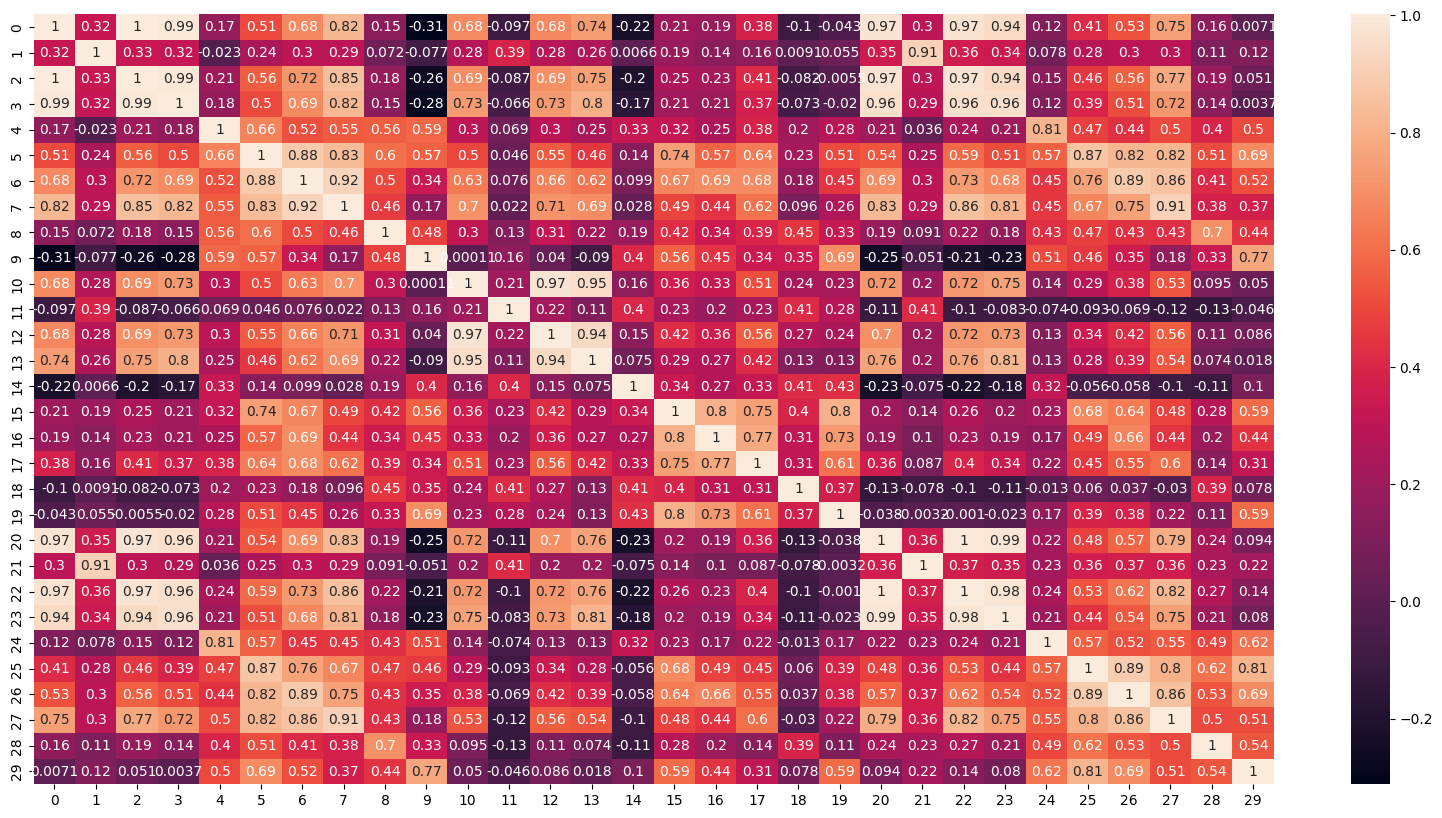

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C = np.cov(X_scaled.T)
plt.figure(figsize=(20, 10))
sns.heatmap(C, annot=True)
plt.show()

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(C)
print(eigenvalues)

[1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 1.33279057e-04
 7.50121413e-04 1.59213600e-03 6.91261258e-03 8.19203712e-03
 1.55085271e-02 1.80867940e-02 2.43836914e-02 2.74877113e-02
 3.12142606e-02 3.00256631e-02]


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

In [ ]:
pc_df = pd.DataFrame(
    data=principal_components,
    columns=['PC1', 'PC2']
)

In [ ]:
pc_df['target'] = Y

<Axes: xlabel='PC1', ylabel='PC2'>

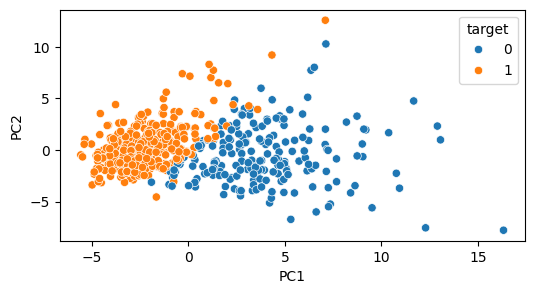

In [ ]:
plt.figure(figsize=(6, 3))
sns.scatterplot(
    data=pc_df,
    x='PC1',
    y='PC2',
    hue='target'
)